<a href="https://colab.research.google.com/github/Gan4x4/CV-HSE2019/blob/master/helloworld/HelloWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-04-09 08:52:36--  https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/2bikes.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205402 (201K) [image/jpeg]
Saving to: ‘/content/bike.jpg’

/content/bike.jpg   100%[===================>] 200.59K  --.-KB/s    in 0.05s   

2020-04-09 08:52:36 (3.85 MB/s) - ‘/content/bike.jpg’ saved [205402/205402]

--2020-04-09 08:52:38--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.170.117
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.170.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘labels.json’

labels.json         100%[====

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth


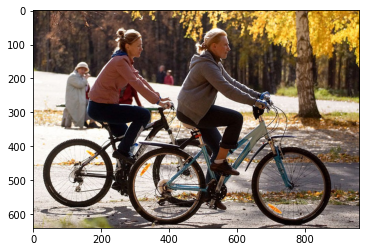

In [0]:
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import json
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

# Download sample image
! wget -O "/content/bike.jpg" https://raw.githubusercontent.com/Gan4x4/CV-HSE2019/master/data/2bikes.jpeg

# Store it in Pillow format and show it
pil_image = Image.open("/content/bike.jpg")
imshow(pil_image)

# Download ImageNet labels file
! wget -O labels.json https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
with open("labels.json") as json_file:
    labels = json.load(json_file)

# Load GoogeNet pretrained on ImageNet
model = models.googlenet(pretrained = True)

In [0]:
# Classify image

transform=transforms.Compose([transforms.ToTensor()])
tensor_image = transform(pil_image)
tensor_image =tensor_image.unsqueeze(0)

# Switch model to evalution mode
model.eval()

# Run model
output = model(tensor_image)

# Display Top 5 class names
top_class_indexes = np.argsort(output[0].detach().numpy())[-5:]
for i in np.flip(top_class_indexes):
  print (labels[str(i)][1])

mountain_bike
bicycle-built-for-two
unicycle
moped
tricycle


Pillow (640, 960, 3) RGB uint8


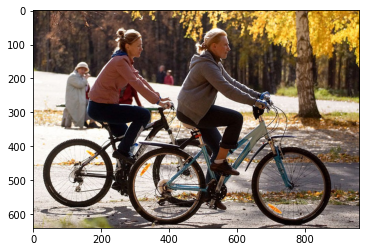

OpenCV (640, 960, 3) BGR


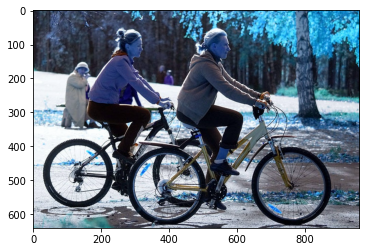

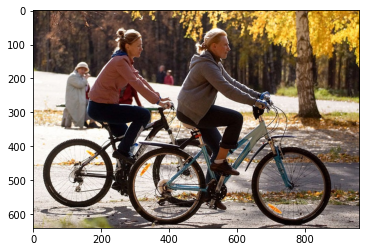

Pytorch tensor torch.Size([1, 3, 640, 960]) torch.float32


In [0]:
# OpenCV vs Pillow
import cv2
import matplotlib.pyplot as plt
plt.figure()

# Open CV image store colors in BGR 
opencv_image = cv2.imread("/content/bike.jpg") 
plt.imshow(pil_image)
print ("Pillow", np.array(pil_image).shape,'RGB',np.array(pil_image).dtype)
plt.show()
plt.imshow(opencv_image)
print ("OpenCV",opencv_image.shape,'BGR')
plt.show()
opencv_image_rgb = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
plt.imshow(opencv_image_rgb)
plt.show()

#Imshow for Tensor
def tensor_show(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 

print("Pytorch tensor",tensor_image.shape,tensor_image.dtype)


